In [1]:
# 네이버 영화 평점 수집
import urllib.request as req
from bs4 import BeautifulSoup

url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210712"
response = req.urlopen(url)
soup = BeautifulSoup(response, "html.parser")

In [2]:
titleOfMovie = soup.find_all('div', {'class' : 'tit5'})

In [3]:
pointOfMovie = soup.find_all('td', {'class' : 'point'})

In [4]:
td_list = soup.find_all('td', {'class' : 'ac'})

In [5]:
rankOfMovie = []
for item in td_list:
    if item.find('img'):
        if item.find('img')['alt'] not in ['na', 'down'] :
            rankOfMovie.append(item.find('img'))

In [6]:
for rank, title, point in zip(rankOfMovie, titleOfMovie, pointOfMovie):
    print(f"{rank['alt']}위의 제목은 {title.text.strip()} 평점은 {point.text.strip()}")

01위의 제목은 극장판 귀멸의 칼날: 무한열차편 평점은 9.28
02위의 제목은 부활: 그 증거 평점은 9.27
03위의 제목은 크루엘라 평점은 9.25
04위의 제목은 해피 투게더 평점은 9.19
05위의 제목은 우드잡 평점은 9.12
06위의 제목은 루카 평점은 9.05
07위의 제목은 번지 점프를 하다 평점은 8.98
08위의 제목은 이보다 더 좋을 순 없다 평점은 8.95
09위의 제목은 더 파더 평점은 8.94
010위의 제목은 남매의 여름밤 평점은 8.94
11위의 제목은 러브 액츄얼리 평점은 8.93
12위의 제목은 중경삼림 평점은 8.92
13위의 제목은 이별의 아침에 약속의 꽃을 장식하자 평점은 8.89
14위의 제목은 잔칫날 평점은 8.87
15위의 제목은 너의 이름은. 평점은 8.79
16위의 제목은 화양연화 평점은 8.77
17위의 제목은 블랙 위도우 평점은 8.56
18위의 제목은 노매드랜드 평점은 8.46
19위의 제목은 링 평점은 8.44
20위의 제목은 너의 췌장을 먹고 싶어 평점은 8.38
21위의 제목은 초속5센티미터 평점은 8.35
22위의 제목은 인 더 하이츠 평점은 8.31
23위의 제목은 콰이어트 플레이스 2 평점은 8.24
24위의 제목은 언어의 정원 평점은 8.17
25위의 제목은 하나와 앨리스 평점은 8.11
26위의 제목은 너의 췌장을 먹고 싶어 평점은 8.09
27위의 제목은 날씨의 아이 평점은 7.95
28위의 제목은 별을 쫓는 아이 평점은 7.92
29위의 제목은 미나리 평점은 7.65
30위의 제목은 분노의 질주: 더 얼티메이트 평점은 7.62
31위의 제목은 킬러의 보디가드 2 평점은 7.37
32위의 제목은 온다 평점은 7.11
33위의 제목은 기기괴괴 성형수 평점은 6.93
34위의 제목은 발신제한 평점은 6.79
35위의 제목은 파이프라인 평점은 6.67
36위의 제목은 컨저링 3: 악마가 시켰다 평점은 6.53
37위의 제목은 미드나이트 평점은 5.20
38위의 제목은 여고괴담 여섯번째 이야기 : 

In [7]:
# 기상청 사이트 수집
import requests
from bs4 import BeautifulSoup

url = "https://www.weather.go.kr/plus/land/current/city.jsp"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [8]:
table = soup.find('table', {'class' : 'table_develop3'})

In [9]:
data = []
for tr in table.findAll("tr"):
  if tr.find('a'):
    data.append([tr.find("a").text,  tr.findAll("td")[5].text,  tr.findAll("td")[9].text ])

In [10]:
with open("weather.csv", "w") as file:
    file.write("point,temperature,humidity\n")

In [11]:
with open("weather.csv", "a") as file:
    for point, temp, humid in data:
        file.write(f"{point},{temp},{humid}\n")

In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df = pd.read_csv("weather.csv", index_col = 'point')

In [13]:
city_df = df.loc[["서울","인천","대전","대구","광주","부산","울산"]]

In [102]:
#그래프의 글자를 선명하게 출력하도록 설정 
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [14]:
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

In [15]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

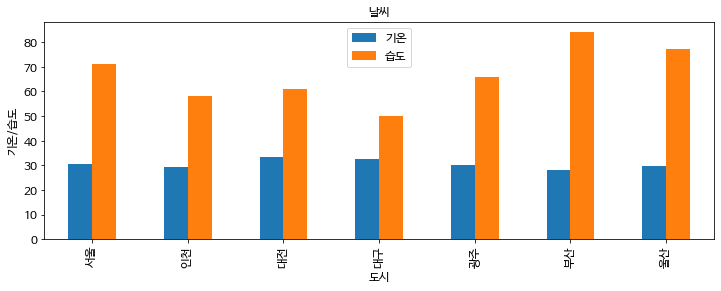

In [16]:
ax = city_df.plot(kind="bar", title="날씨", figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize = 12)
ax.set_ylabel('기온/습도', fontsize = 12)
ax.legend(['기온', '습도'], fontsize = 12)